# This is a demo of how to load MNIST raw pngs manually and use CrysX for neural network machine learning

## Run the following for Google colab 
then restart runtime

In [ ]:
! pip install --upgrade --no-cache-dir https://github.com/manassharma07/crysx_nn/tarball/main
! pip install IPython==7.7.0

In [69]:
from PIL import Image
import matplotlib.pyplot as plt
from crysx_nn import mnist_utils as mu
import numpy as np

## Download MNIST_orig and MNIST_plus dataset (May take upto 5 min)

In [3]:
%%time
mu.downloadMNIST()

Wall time: 2min 40s


## Load the training dataset from MNIST_plus in memory (May take upto 5 min)

In [70]:
%%time
path = 'MNIST-PLUS-PNG/mnist_plus_png'
trainData, trainLabels = mu.loadMNIST(path_main=path, train=True, shuffle=True)

Wall time: 11.1 s


In [71]:
print('Training data shape', trainData.shape)
print('Training labels shape',trainLabels.shape)
print('Size of training data in memory (GB)', trainData.nbytes/1024/1024/1024)

Training data shape (62250, 28, 28)
Training labels shape (62250, 1)
Size of training data in memory (GB) 0.3636181354522705


In [72]:
# Statistics
print(trainData.min()) # Expected for MNIST_orig: 0.0
print(trainData.max()) # Expected for MNIST_orig: 255.
print(trainData.mean()) # Expected for MNIST_orig: 33.31842144
print(trainData.std()) # Expected for MNIST_orig: 78.567489983

0.0
255.0
32.67065896238013
77.61966293557178


## Normalize within the range [0,1.0]

In [73]:
trainData = trainData/255 # Normalize
# Statistics
print(trainData.min()) # Expected for MNIST_orig: 0.0
print(trainData.max()) # Expected for MNIST_orig: 1.0
print(trainData.mean()) # Expected for MNIST_orig: 0.1306604762738426
print(trainData.std()) # Expected for MNIST_orig: 0.3081078038564622 

trainData_mean = trainData.mean()
trainData_std = trainData.std()


0.0
1.0
0.12812023122502064
0.3043908350414582


## Standardize the data so that it has mean 0 and variance 1

In [74]:
trainData = (trainData - np.mean(trainData)) / np.std(trainData)
# Statistics
print(trainData.min()) # Expected for MNIST_orig: -0.42407
print(trainData.max()) # Expected for MNIST_orig: 2.8215433
print(trainData.mean()) # Expected for MNIST_orig: 0.0
print(trainData.std()) # Expected for MNIST_orig: 1.0000

-0.42090699349594607
2.8643430366628113
-1.6957937208201499e-15
0.9999999999999979


## Convert labels to one-hot vectors

In [75]:
print(trainLabels)
trainLabels = mu.one_hot_encode(trainLabels, 10)
print(trainLabels)

[[6.]
 [4.]
 [7.]
 ...
 [4.]
 [2.]
 [9.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Flatten the input numpy arrays (nSamples,28,28)->(nSamples, 784)

In [76]:
trainData = trainData.reshape(trainData.shape[0], 784)

## Let us create a NN using CrysX-NN now

In [77]:
nInputs = 784 # No. of nodes in the input layer
neurons_per_layer = [256, 10] # Neurons per layer (excluding the input layer)
activation_func_names = ['ReLU', 'Softmax']
nLayers = len(neurons_per_layer)
nEpochs = 9
batchSize = 200 # No. of input samples to process at a time for optimization

In [78]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='CPU', init_method='Xavier') 

model.lr = 0.3

Note: The model will use the following device for all the computations:  CPU


## Check the model details

In [79]:
model.details()

----------------------------------------------------------------------------------
****Neural Network Model Details****
----------------------------------------------------------------------------------
Number of input nodes:  784
Number of layers (hidden+output):  2
Number of nodes in each layer (hidden & output):  [256, 10]
Activation function for each layer (hidden & output):   ['ReLU', 'Softmax']
Method used for weights and biases initialization:   Xavier
Batch Size:  200
Device:  CPU
Optimization method:  SGD
Learning rate:  0.3
----------------------------------------------------------------------------------


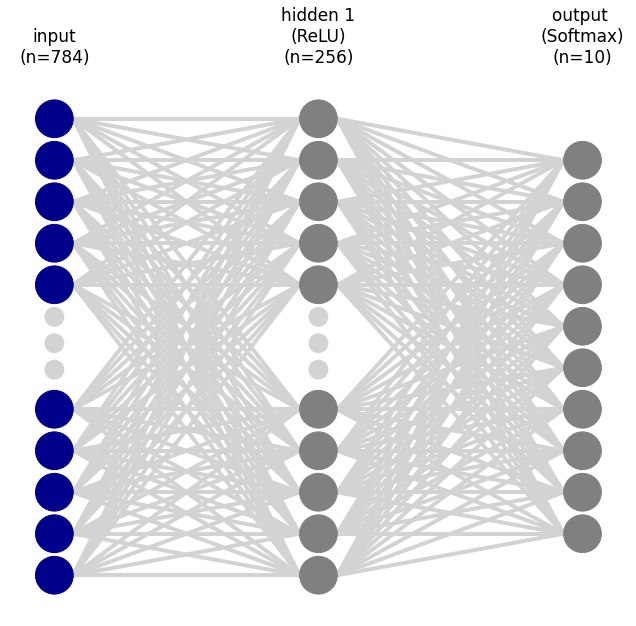

In [80]:
model.visualize()

## Optimize/Train the network

In [81]:
inputs = trainData.astype(np.float32)
outputs = trainLabels.astype(np.float32)
# Run optimization
# model.optimize(inputs, outputs, lr=0.4,nEpochs=nEpochs,loss_func_name='BCE', miniterEpoch=1, batchProgressBar=True, miniterBatch=100)
# To get accuracies at each epoch
model.optimize(inputs, outputs, lr=0.3,nEpochs=nEpochs,loss_func_name='CCE', miniterEpoch=1, batchProgressBar=True, miniterBatch=100, get_accuracy=True)


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2938646758693176


  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/311 [00:00<?, ?it/s]

## Error at each epoch

In [82]:
print(model.errors)

[0.2938646758693176, 0.10964424642774101, 0.07343906786586273, 0.053800470961329616, 0.04066238735776522, 0.031045450524971707, 0.02376107319400495, 0.018374580980923264, 0.014358662589989041]


## Accuracy at each epoch

In [83]:
print(model.accuracy)

[0.9107073954983917, 0.9681993569131849, 0.9791157556270127, 0.9849035369774954, 0.9893408360128647, 0.9927331189710642, 0.9951607717041823, 0.9968006430868181, 0.9981511254019302]


## Save model weights and biases

In [84]:
# Save weights
model.save_model_weights('NN_crysx_mnist_plus_98.11_weights')
# Save biases
model.save_model_biases('NN_crysx_mnist_plus_98.11_biases')

## Load model weights and biases from files

In [85]:
model.load_model_weights('NN_crysx_mnist_plus_98.11_weights')
model.load_model_biases('NN_crysx_mnist_plus_98.11_biases')

In [86]:
from crysx_nn import loss
### Baseline: just say it's anything at probability 1/N, what's the loss?
N = 10
labels = np.zeros((1, 10), dtype=np.float32)
labels[0, 3] = 1.
output = np.full_like(labels, 1./N)
print(loss.BCE_loss(output, labels))

0.32508277339150504


## Test data set

In [87]:
path = 'MNIST-PLUS-PNG/mnist_plus_png'
testData, testLabels = mu.loadMNIST(path_main=path, train=False, shuffle=True)

print('Test data shape', testData.shape)
print('Test labels shape',testLabels.shape)
print('Size of training data in memory (GB)', testData.nbytes/1024/1024/1024)

# Statistics
print(testData.min()) # Expected for MNIST_orig: 0.0
print(testData.max()) # Expected for MNIST_orig: 255.
print(testData.mean()) # Expected for MNIST_orig: 33.31842144
print(testData.std()) # Expected for MNIST_orig: 78.567489983

## Normalize within the range [0,1.0]

testData = testData/255 # Normalize
# Statistics
print(testData.min()) # Expected for MNIST_orig: 0.0
print(testData.max()) # Expected for MNIST_orig: 1.0
print(testData.mean()) # Expected for MNIST_orig: 0.1306604762738426
print(testData.std()) # Expected for MNIST_orig: 0.3081078038564622 

## Standardize the data so that it has mean 0 and variance 1
# Use the mean and std of training data **********
testData = (testData - trainData_mean) / trainData_std
# Statistics
print(testData.min()) # Expected for MNIST_orig: -0.42407
print(testData.max()) # Expected for MNIST_orig: 2.8215433
print(testData.mean()) # Expected for MNIST_orig: 0.0
print(testData.std()) # Expected for MNIST_orig: 1.0000

## Convert labels to one-hot vectors
print(testLabels)
testLabels = mu.one_hot_encode(testLabels, 10)
print(testLabels)

## Flatten the input numpy arrays (nSamples,28,28)->(nSamples, 784)
testData = testData.reshape(testData.shape[0], 784)
print(testData.shape)


Test data shape (10000, 28, 28)
Test labels shape (10000, 1)
Size of training data in memory (GB) 0.05841255187988281
0.0
255.0
33.791224489795916
79.17246322228637
0.0
1.0
0.132514605842337
0.31048024793053536
-0.42090699349594607
2.8643430366628113
0.01443661934406721
1.0200052438774894
[[5.]
 [6.]
 [1.]
 ...
 [5.]
 [8.]
 [7.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(10000, 784)


## Performance on Test data

In [88]:
## Convert to float32 arrays
inputs = testData.astype(np.float32)
outputs = testLabels.astype(np.float32)
predictions, error = model.predict(inputs, outputs, loss_func_name='CCE')
print('Error:',error)
# print(predictions)
predictions, error, accuracy = model.predict(inputs, outputs, loss_func_name='CCE', get_accuracy=True)
print('Error:',error)
print('Accuracy %:',accuracy*100)

Error: 0.06367936007725956
Error: 0.06367936007725956
Accuracy %: 98.2


## Confusion matrix

Confusion matrix:
 [[9.700e+02 0.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  2.000e+00 1.000e+00 2.000e+00]
 [0.000e+00 1.126e+03 3.000e+00 2.000e+00 0.000e+00 0.000e+00 3.000e+00
  0.000e+00 1.000e+00 0.000e+00]
 [2.000e+00 1.000e+00 1.011e+03 4.000e+00 1.000e+00 0.000e+00 2.000e+00
  6.000e+00 5.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 3.000e+00 9.990e+02 0.000e+00 3.000e+00 0.000e+00
  1.000e+00 1.000e+00 3.000e+00]
 [3.000e+00 0.000e+00 3.000e+00 0.000e+00 9.630e+02 0.000e+00 2.000e+00
  1.000e+00 0.000e+00 1.000e+01]
 [3.000e+00 0.000e+00 0.000e+00 9.000e+00 0.000e+00 8.700e+02 4.000e+00
  2.000e+00 3.000e+00 1.000e+00]
 [3.000e+00 2.000e+00 0.000e+00 1.000e+00 3.000e+00 2.000e+00 9.470e+02
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.000e+00 7.000e+00 4.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.007e+03 1.000e+00 5.000e+00]
 [2.000e+00 0.000e+00 3.000e+00 1.000e+01 2.000e+00 2.000e+00 3.000e+00
  2.000e+00 9.480e+02 2.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 8.00

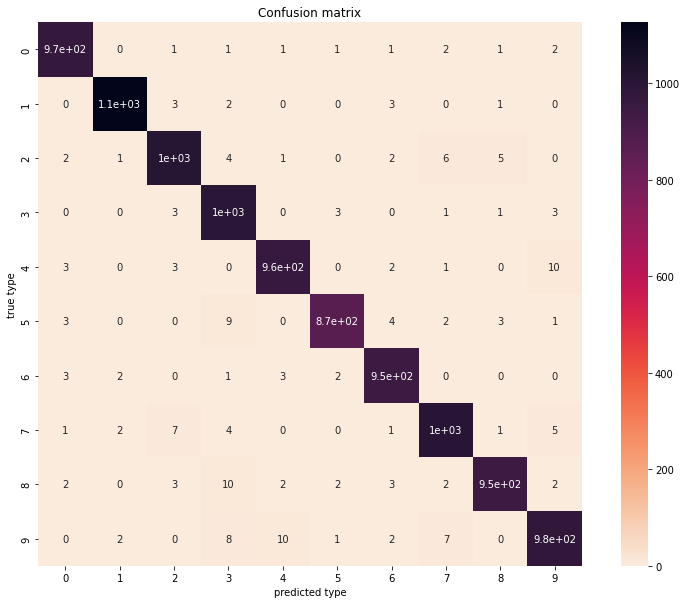

In [89]:
from crysx_nn import utils

# Get the indices of the maximum probabilities for each sample in the predictions array
pred_digit = np.argmax(predictions, axis=1)
# Get the digit index from the one-hot encoded array
true_digit = np.argmax(testLabels, axis=1)
# Calculation confusion matrix
cm = utils.compute_confusion_matrix(pred_digit, true_digit)
print('Confusion matrix:\n',cm)

# Plot the confusion matrix
plt.rcParams["figure.figsize"] = (14,10)
utils.plot_confusion_matrix(cm)

## Interactive test

Probabilities for all the digits:
[[1.59947363e-08 9.98445381e-01 3.02269789e-05 6.37976076e-04
  5.92239240e-06 1.18308920e-06 7.70533966e-07 1.06416123e-04
  6.43630211e-04 1.28477345e-04]]
Prediction
1
Top 3 predictions
[1 8 3]
Their probabilities (%)
[9.98445381e+01 6.43630211e-02 6.37976076e-02]


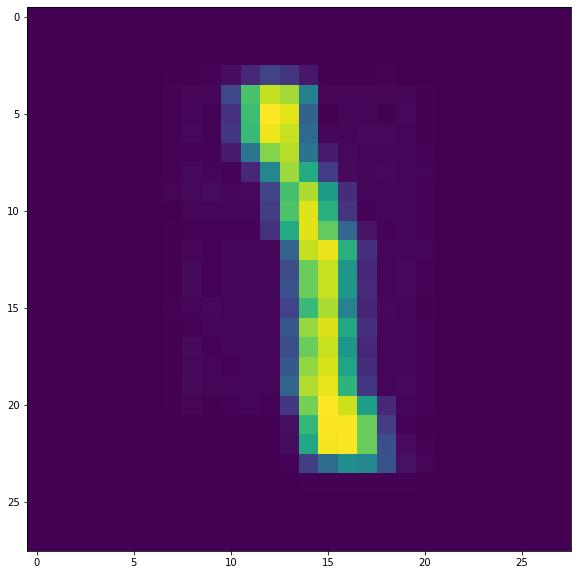

In [92]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
import cv2

width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.jpg"
    global output_image 
    output_image.save(filename)
    ###### Centering begin
    # Load image as grayscale and obtain bounding box coordinates
    image = cv2.imread('user_input.jpg', 0)
#     print(image)
    height, width = image.shape
    x,y,w,h = cv2.boundingRect(image)

    # Create new blank image and shift ROI to new coordinates
    ROI = image[y:y+h, x:x+w]
    mask = np.zeros([ROI.shape[0]+10,ROI.shape[1]+10])
    width, height = mask.shape
#     print(ROI.shape)
#     print(mask.shape)
    x = width//2 - ROI.shape[0]//2 
    y = height//2 - ROI.shape[1]//2 
#     print(x,y)
    mask[y:y+h, x:x+w] = ROI
#     print(mask)
    # Check if centering/masking was successful
#     plt.imshow(mask, cmap='viridis') 
    output_image = PIL.Image.fromarray(mask) # mask has values in [0-255] as expected
# Now we need to resize, but it causes problems with default arguments as it changes the range of pixel values to be negative or positive
    # compressed_output_image = output_image.resize((22,22))
    # Therefore, we use the following:
    compressed_output_image = output_image.resize((22,22), PIL.Image.BILINEAR) # PIL.Image.NEAREST or PIL.Image.BILINEAR also performs good

#     # Enhance Saturation
#     converter = PIL.ImageEnhance.Color(compressed_output_image)
#     compressed_output_image = converter.enhance(2.5)
    # Enhance contrast
#     converter = PIL.ImageEnhance.Contrast(compressed_output_image)
#     compressed_output_image = converter.enhance(3.5)
    # normalize in the range 0-1
    tensor_image = np.array(compressed_output_image.getdata())/255.
    tensor_image = tensor_image.reshape(22,22)
    # Padding
    tensor_image = np.pad(tensor_image, (3,3), "constant", constant_values=(0,0))
    # Normalization should be done after padding i guess
    tensor_image = (tensor_image - trainData_mean) / trainData_std
    plt.imshow(tensor_image.reshape(28,28), cmap='viridis')
    # Debugging
#     print(tensor_image)
#     print(np.array(compressed_output_image.getdata())) # Get data values)
#     print(np.array(image.getdata()))

    ### Compute the predictions
    output0 = model.predict(tensor_image.reshape(1,784))
    print('Probabilities for all the digits:')
    print(output0)
    output = np.argmax(output0)
    print('Prediction')
    print(output)
    print('Top 3 predictions')
    print(output0[0].argsort()[-3:][::-1])
    print('Their probabilities (%)')
    ind = output0[0].argsort()[-3:][::-1]
    print(output0[0,ind]*100)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
#     canvas.create_oval(x1, y1, x2, y2, fill="white",width=24)
    canvas.create_rectangle(x1, y1, x2, y2, fill="white",width=12)
    draw.line([x1, y1, x2, y2],fill="white",width=4)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), 0)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

## Inference with 256 nodes; lr=0.4, 15 epochs:
recognition of 1 has significantly improved in MNIST_PLus, but when it has both the above and bottom additional lines then it gets classified as 3 for some reason. Although, 1 with just the upper additional line is predicted correctly.


Prediction of 7 is now massively improved when using MNIST_plus. It is amazing.

Classification of 2, 3, 4, 5, 6, 7, 8, and 9 are no problem.

## Inference with 512 nodes; lr=0.7, 15 epochs:
Now 1 is predicted correctly most of the times.

But 8 can be a problem sometimes.

Classification of 1, 2, 3, 4, 5, 6, 7, and 9 are no problem.

## Inference with 256 nodes; lr=0.4; just 5 epochs:
It seems like earlier we were running into some overfitting issues when going to 15 epochs. Even 5 epochs seem to be causing overkill as the training accuracy surpasses testing accuracy after just 3 epochs. 

When using just 5 epochs there are no issues in the prediction of 1 or 8 as in the above cases.

In fact, all the digits are recognized reasonably correctly except 8 which got confuesed with 5, 7 and 6 sometimes.
(Sometimes 9 was mistaken for 4 as well)

Although, the confidence of the result is not as good as what you get with CNNs.

## Inference with 256 nodes; lr=0.4;  7 epochs:
2 was predicted as 7 sometimes

3 was predicted as 5 sometimes

4 was predicted as 6,1,2  or 5

## Inference with 256 nodes; lr=0.4;  10 epochs:
1 was predicted correctly as long as it didnt have a too long bottom underline

4 was a bit problematic.

2 was a bit problematic.

## Inference with 256 nodes; lr=0.4;  20 epochs:
4 was a bit problematic.

The problem with 1 underline was gone.

2 was a bit problematic.

## Inference with 256 nodes; lr=0.4;  30 epochs:
4 was a bit problematic.

9 was a bit problematic.

8 was a bit problematic.